# Project: Investigate TMDB Movie Data
### Table of contents
<li>Introduction
<li>Data Wrangling
<li>Exploratory Data Analysis
<li>Conclusion


## Introduction

In this project we will be investigating TMDB movie dataset which contains data about around 5000 movies, We will analyis the relationship between the movies' languages and their budget, revenue, popularity and vote rating.
We will be using these features from the dataset in our analysis:
<li>budget
<li>original_language
<li>popularity
<li>release_date
<li>revenue	vote_average
<br><br>
We will also answer these questions:<br>
1. What are the languages which have the heighest average revenues?<br>
2. What are the languages which have the heighest average budgets?<br>
3. What are the languages which have the heighest average rates?<br>
4. English movies popularity change over time<br>
5. Chinese movies popularity change over time<br>
6. Japanese movies popularity change over time<br>
7. Hebrew movies popularity change over time<br>
8. Indonesian movies popularity change over time<br>
9. Does increasing the budget affect the revenue?

*Importing the importnant libraries*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

## Data Wrangling

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
movies.shape

(4803, 20)

*Applyig some statistics to understand the data more*

In [5]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


*Checking if there is any missing values in the columns we will use*

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

*Checking the duplicates in our dataframe*

In [7]:
movies.duplicated().sum()

0

*Subsetting the dataframe with only the columns we will use*

In [8]:
movies.drop(['genres', 'homepage', 'id', 'keywords', 'original_title', 'overview', 'production_companies', 'production_countries','runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_count'], axis = 1, inplace = True)

*Now we have the dataframe with only the columns we use*

In [9]:
movies.head()

,budget,original_language,popularity,release_date,revenue,vote_average
0,237000000,en,150.437577,12/10/2009,2787965087,7.2
1,300000000,en,139.082615,5/19/2007,961000000,6.9
2,245000000,en,107.376788,10/26/2015,880674609,6.3
3,250000000,en,112.312950,7/16/2012,1084939099,7.6
4,260000000,en,43.926995,3/7/2012,284139100,6.1


*Transforming release_date column into date data type*

In [10]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             4803 non-null   int64         
 1   original_language  4803 non-null   object        
 2   popularity         4803 non-null   float64       
 3   release_date       4802 non-null   datetime64[ns]
 4   revenue            4803 non-null   int64         
 5   vote_average       4803 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 225.3+ KB


In [12]:
movies['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# EDA

*Creating a function to calculate the avg of the feature grouped by the original_language column which will be used several times*

In [13]:
def language_avg(feature):
    movies.groupby('original_language')[feature].mean().sort_values(ascending=False).head(3).plot(kind = 'bar', rot = 0)
    plt.title('Top 3 movies languages average '+ str(feature))
    plt.xlabel('Language')
    plt.ylabel('avg '+ str(feature))

### *1. What are the languages which have the heighest average revenues?*

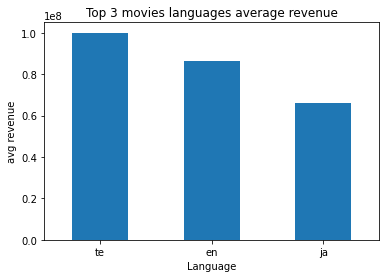

In [14]:
language_avg('revenue')

*Telugu, English, Japanese are the top 3 language who has the hieghest average revenues*

### *2. What are the languages which have the heighest average budgets?*

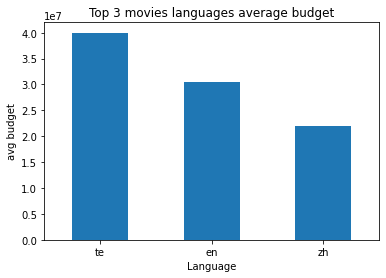

In [15]:
language_avg('budget')

*Telugu, English, Chinese are the top 3 language who has the hieghest average budgets*

### *3. What are the languages which have the heighest average rates?*

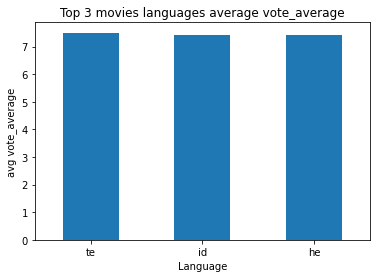

In [16]:
language_avg('vote_average')

*Telugu, Indonesian, Hebrew are the top 3 language who has the hieghest average rates*

*Creating a function to calculate the change of the movie languages popularity over the time which will be used several times*

In [17]:
def language_popularity(language_code):
    language = movies[movies['original_language'].str.contains(language_code)]
    language.groupby(['release_date'])['popularity'].mean().plot()
    plt.xlabel('time')
    plt.ylabel('popularity')
    plt.title(str(language_code) + ' movie language popularity chnge over time')

### *4. English movies popularity change over time*

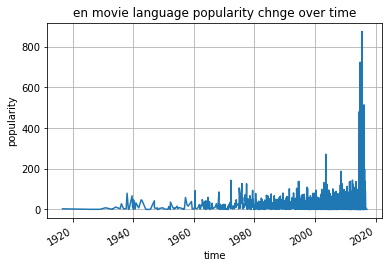

In [18]:
language_popularity('en')
plt.grid(True)

*The English movies popularity has increased over the time and it has a significant growth in the new century*

### **Chinense**

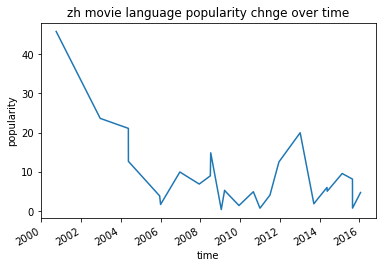

In [19]:
language_popularity('zh')

*The Chinese movies popularity has massive declination starting from 2001 to 2006 and then it started to grow and decline, but not as with the same popularity as before*

### **Japanese**

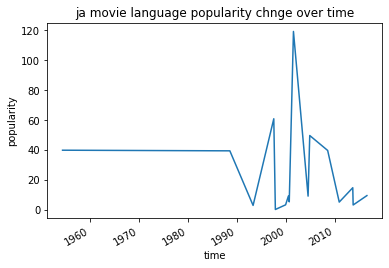

In [20]:
language_popularity("ja")

*The Japanese movies popularity was stagnating till the 90s and it has a massive growth by the begging of the new century before it started to decline agian after 2005*

### **Hebrew**

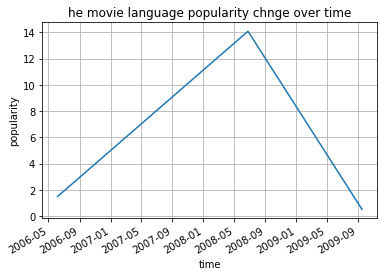

In [21]:
language_popularity('he')
plt.grid(True)

*The Hebrew movies populrity started to increase from 2006 till 2008 and then it declined massively*

### **Indonesian**

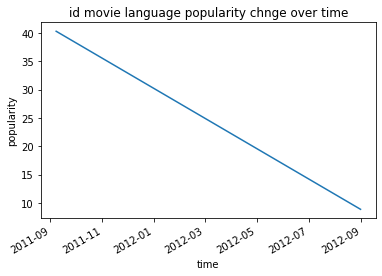

In [22]:
language_popularity("id")

*The Indonesian movies popularity decreased alot during from 2011 till 2012*

### *9. Does increasing the budget affect the revenue?*

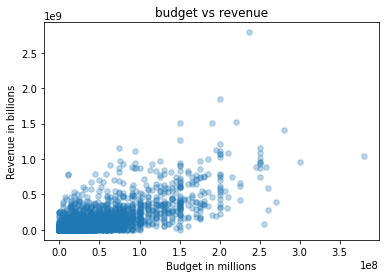

In [37]:
plt.scatter(movies['budget'], movies['revenue'], alpha = .3, s = 30)
plt.title('budget vs revenue')
plt.xlabel('Budget in millions')
plt.ylabel('Revenue in billions');

Most the movies have budgets between 0 to 100M and revenues between 0 to 500M and the movies which have significantly higher revenues have also higher budget, so increasing the movie budget will often increase its revenue.  

## Conclusions

In the first part of our analysis we ranked the top 3 movies langauge in the revenue, budget and rates and we found out the heighest movie language in the average budget, revenue and rate was the Telugu language.

In the second part we viewed the change of the movies languge popularity over the time.

In the third and last part we analyized the relationship between the movies budget and revenues to see of the movies with heigher revenues have higher budget and we found out that this is true, so the more the budget is, The more revenue the movie will get.

### Limitations

The dataset set was pretty clean except for some column that have some missing values, but we didn't use them in our analysis, so we needn't to have much data cleaning except for droping the columns we don't use and transforming the release_date column into the right data type.

The dataset lacks the data of much movies in specific language which affected our analyis when analyized the relationship between the movie languages and their average budget, revenue and rates, also it affected the time range of the movie language popularity chage over the time.